In [1]:
# 1️⃣ Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# 2️⃣ Download example stock data
ticker = "MSFT"
data = yf.download(ticker, start="2023-01-01", end="2023-06-01", interval="1d")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17320\3500307837.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2023-06-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


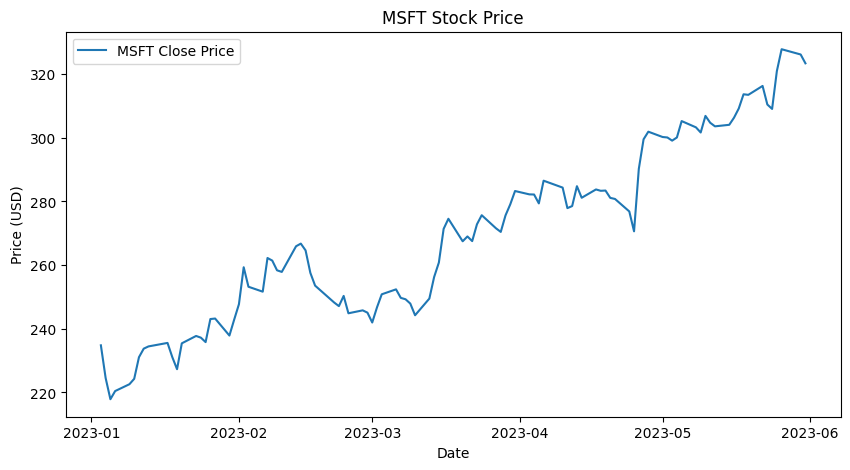

In [3]:
# 3️⃣ Plot closing price
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label=f'{ticker} Close Price')
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [5]:
# Make sure it's a Series, not DataFrame
mid_price = data['Close'].squeeze()

# Simulate spread between 2-10 cents
spread = np.random.uniform(0.02, 0.10, size=len(mid_price))

# Calculate bid and ask
bid_price = mid_price - spread / 2
ask_price = mid_price + spread / 2

# Create DataFrame
spread_df = pd.DataFrame({
    'Mid Price': mid_price,
    'Bid Price': bid_price,
    'Ask Price': ask_price
})

spread_df.head()

,Mid Price,Bid Price,Ask Price
Date,,,
2023-01-03,234.808945,234.795764,234.822125
2023-01-04,224.537643,224.524607,224.550680
2023-01-05,217.882874,217.836300,217.929447
2023-01-06,220.450684,220.414183,220.487184
2023-01-09,222.597076,222.576228,222.617925


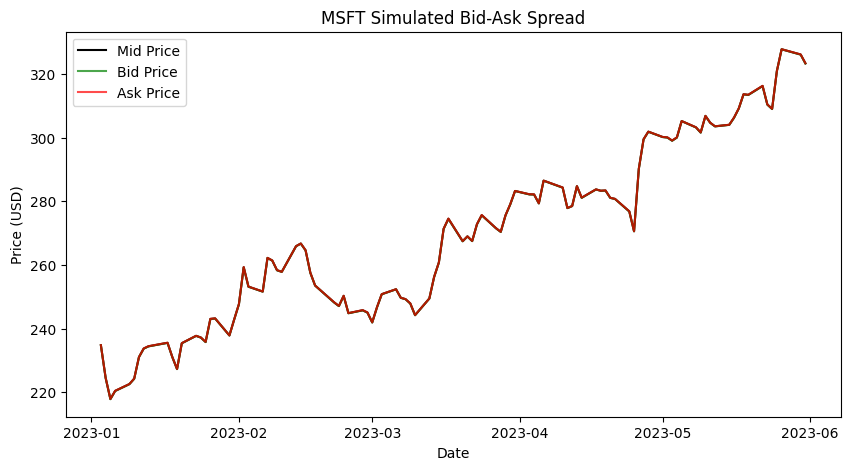

In [8]:
# 5️⃣ Plot bid-ask spread
plt.figure(figsize=(10,5))
plt.plot(spread_df['Mid Price'], label='Mid Price', color='black')
plt.plot(spread_df['Bid Price'], label='Bid Price', color='green', alpha=0.7)
plt.plot(spread_df['Ask Price'], label='Ask Price', color='red', alpha=0.7)
plt.title(f"{ticker} Simulated Bid-Ask Spread")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()